# Homework 04 | WEEK 04 (27.09-04.10.2022) | Machine Learning Zoomcamp

Link to the homework [here](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/04-evaluation/homework.md)

## Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Her's is a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv):

```

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

```

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`).

### getting the data

In [1]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

In [2]:
#!wget $data -O data-homework-04.csv 

In [3]:
ls

data-homework-04.csv  homework_04.ipynb


### import the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### read it with pandas

In [5]:
df = pd.read_csv('data-homework-04.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Checklist:

* Names of all columns are in small letters and separted by underscores
* Number of missing values in each column
* Number of unique value in each column
* unique values in each column
* datatypes of each column and does it makes sense e.g. age is a string and not int

In [6]:
df.shape

(1319, 12)

In [7]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [8]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [9]:
df.nunique()

card              2
reports          13
age             418
income          431
share          1162
expenditure     981
owner             2
selfemp           2
dependents        7
months          193
majorcards        2
active           35
dtype: int64

`card` is our target variable. Other than that `reports`, `owner`, `selfemp`, `dependents` and `majorcards` looks like possible candidate for categorical variables. 

In [10]:
df['majorcards'].unique()

array([1, 0])

In [11]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

I think `majorcards` should be object i.e. in `True` or `False`. Let's look into the homework now.

## Preparation

* Create the target variable by mapping `yes` to 1 and `no` to 0.
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.

In [12]:
df.card

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
1314    yes
1315     no
1316    yes
1317    yes
1318    yes
Name: card, Length: 1319, dtype: object

In [13]:
df.card = (df.card == 'yes').astype(int)
df.card

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [14]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
len(df),len(df_full_train), len(df_test)

(1319, 1055, 264)

Now to get our y-variable

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values
y_full_train = df_full_train.card.values

In [20]:
del df_train['card']
del df_val['card']
del df_test['card']
del df_full_train['card']

In [21]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* `reports`
* `dependents`
* `active`
* `share`

In [22]:
feature_q1 = ['reports', 'dependents', 'active', 'share']

In [23]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [24]:
for f in feature_q1:
    auc = roc_auc_score(y_train, df_train[f])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[f])
    print('%s %.3f'%(f, auc))

reports 0.717
dependents 0.533
active 0.604
share 0.989


**Answer to Q1:**

`share` has the highest AUC.

## Training the model

From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.615
* 0.515
* 0.715
* 0.995


In [25]:
features = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active', 'owner', 'selfemp']
features

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active',
 'owner',
 'selfemp']

In [26]:
df.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [28]:
df_train

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4
...,...,...,...,...,...,...,...,...,...,...,...
786,0,53.00000,2.4500,0.017718,35.67500,yes,no,0,3,1,11
787,2,30.58333,2.5000,0.000480,0.00000,no,no,0,12,1,18
788,0,24.75000,1.8750,0.080708,126.02250,no,no,1,14,0,1
789,1,56.91667,3.4838,0.062895,182.09580,yes,no,0,540,1,7


In [29]:
train_dicts = df_train[features].to_dict(orient='records') 
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [30]:
val_dicts = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model= LogisticRegression(solver='liblinear', C=1.0, max_iter=1000) #why random_state not specified
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
y_pred = model.predict_proba(X_val)[:, 1]

In [35]:
len(y_pred)

264

In [36]:
#y_pred = (y_pred.round(3)>0.5).astype(int)
y_pred.round(3)

array([1.   , 0.058, 1.   , 0.02 , 1.   , 1.   , 0.07 , 1.   , 1.   ,
       0.996, 0.138, 1.   , 1.   , 1.   , 1.   , 0.014, 1.   , 1.   ,
       0.232, 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   ,
       1.   , 0.   , 0.   , 1.   , 0.004, 0.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 1.   , 0.004,
       1.   , 1.   , 1.   , 0.171, 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 0.   , 0.056, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.005, 0.171,
       1.   , 1.   , 0.126, 1.   , 1.   , 0.139, 1.   , 1.   , 1.   ,
       1.   , 1.   , 0.985, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 0.128, 1.   , 1.   , 0.302, 1.   , 0.025, 1.   ,
       1.   , 1.   , 1.   , 0.848, 1.   , 1.   , 1.   , 1.   , 1.   ,
       0.036, 0.037, 1.   , 1.   , 0.991, 1.   , 0.098, 1.   , 0.342,
       1.   , 1.   , 1.   , 1.   , 0.999, 0.026, 1.   , 0.   , 0.298,
       0.156, 0.184,

In [37]:
roc_auc_score(y_val, y_pred).round(3)

0.995

**Answer to question 2:**

`0.995`

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.1
* 0.3
* 0.6
* 0.8

In [38]:
threshold = np.linspace(0.0, 1.0, 100)  # step of 0.01

In [39]:
from sklearn.metrics import confusion_matrix

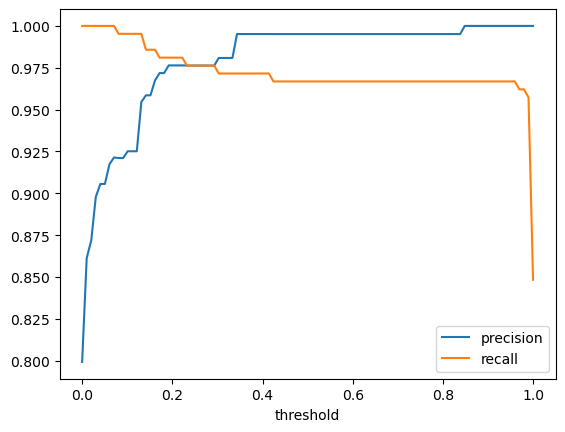

In [52]:
precision = []
Recall = []
F1_list = []
for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp /(tp+fp)
    R = tp/(tp+fn)
    precision.append(p)
    Recall.append(R)
    
    #for Q 04
    F1 = 2 * p * R / (p + R)
    F1_list.append(F1)
    

plt.plot(threshold, precision, label = 'precision')
plt.plot(threshold, Recall, label = 'recall')
plt.legend()
plt.xlabel('threshold')
plt.show()

In [41]:
# Let's just try using confusion_matrix method from sklearn.metrics

In [48]:
t = 0.5

In [49]:
confusion_matrix(y_val, (y_pred>=t).astype(int), normalize = 'all')

array([[0.1969697 , 0.00378788],
       [0.02651515, 0.77272727]])

In [50]:
p = 0.77272727/(0.77272727+0.00378788)
p

0.9951219496490185

In [51]:
R = 0.77272727/(0.77272727+0.02651515)
R

0.9668246462694009

**Answer to question 3:**

`0.3`

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

* 0.1
* 0.4
* 0.6
* 0.7


Text(0, 0.5, 'F1 =  2 * P * R / (P + R)')

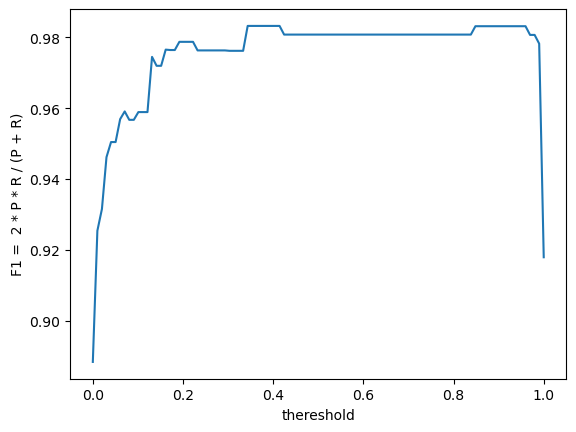

In [56]:
plt.plot(threshold, F1_list)
plt.xlabel('thereshold')
plt.ylabel('F1 =  2 * P * R / (P + R)')

**Answer to Q4:**

`0.4`

### Question 5:

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`


* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?


* 0.003
* 0.014
* 0.09
* 0.24
